<a href="https://colab.research.google.com/github/Safana14/netflix-data-analysis/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style='whitegrid')
import plotly.express as px

# **Load Dataset**

In [5]:
file_path = file_path = '/content/netflix1.csv'
data = pd.read_csv(file_path)

data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# **Data Exploration and Preprocessing**

In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.shape

(8790, 10)

In [ ]:
print(data.info(), "\n")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None 

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [ ]:
data.count()

,0
show_id,8790
type,8790
title,8790
director,8790
country,8790
date_added,8790
release_year,8790
rating,8790
duration,8790
listed_in,8790


In [ ]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
data.type

,type
0,Movie
1,TV Show
2,TV Show
3,Movie
4,Movie
...,...
8785,TV Show
8786,TV Show
8787,TV Show
8788,TV Show


# Data Null Percentage Analysis

In [ ]:
null_counts = data.isnull().sum()
total_rows = len(data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_data = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_data = null_percentage_data.sort_values(by='Null Percentage', ascending=False)
null_percentage_data.reset_index(drop=True, inplace=True)
print(null_percentage_data)


     Column Name  Null Percentage
0        show_id              0.0
1           type              0.0
2          title              0.0
3       director              0.0
4        country              0.0
5     date_added              0.0
6   release_year              0.0
7         rating              0.0
8       duration              0.0
9      listed_in              0.0
10    year_added              0.0
11   month_added              0.0


#  Imputation of Missing Values in Netflix Dataset



In [ ]:
columns_to_impute = ['director', 'country', 'title', 'rating', 'duration']

for column in columns_to_impute:
    null_count = data[column].isnull().sum()
    data[column] = data[column].fillna("Unknown")
    print(f"Filled {null_count} missing values in '{column}' column.")

Filled 0 missing values in 'director' column.
Filled 0 missing values in 'country' column.
Filled 0 missing values in 'title' column.
Filled 0 missing values in 'rating' column.
Filled 0 missing values in 'duration' column.


# Convert data added to datatime

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


#  Replace empty strings with NaN and strip whitespace


In [ ]:
data.replace('', pd.NA, inplace=True)
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)


# Drop duplicates


In [ ]:
data.drop_duplicates(inplace=True)


# Display missing values


In [ ]:
missing_summary = data.isna().sum()
print("Missing values:\n", missing_summary)


Missing values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


# Fill or drop missing data


In [ ]:
data['country'] = data['country'].fillna('Unknown')
data['director'] = data['director'].fillna('Not Available')
data['rating'] = data['rating'].fillna('Not Rated')
data.dropna(subset=['date_added'])


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


# **Visualization Of Data**

# Content Type Distribution

/tmp/ipython-input-8-1672338353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='pastel')


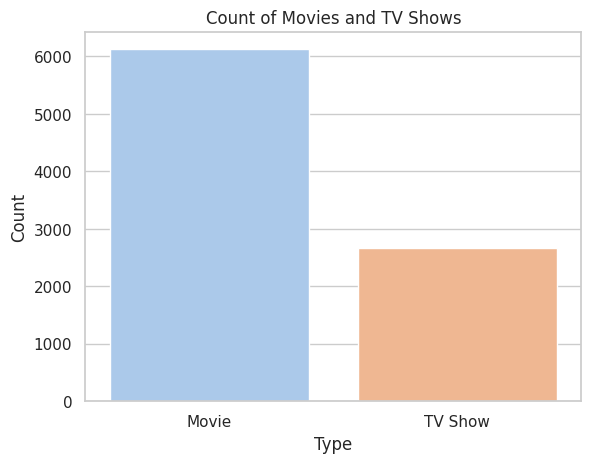

In [8]:
type_counts = data['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

sns.countplot(data=data, x='type', palette='pastel')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Top 10 Genres

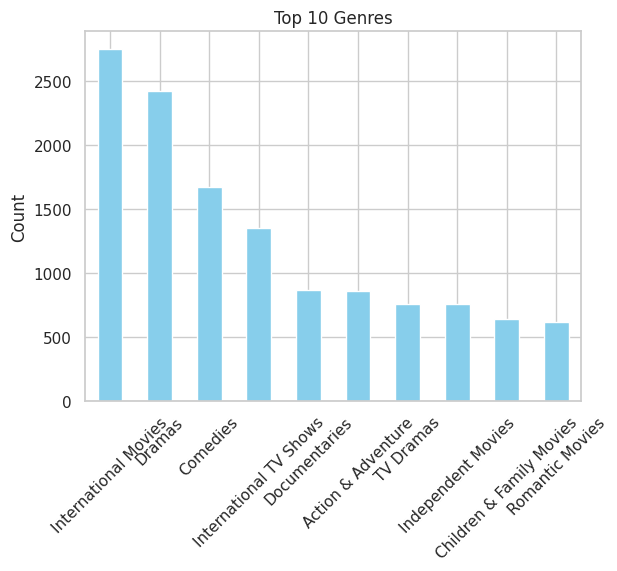

In [9]:
genres = data['listed_in'].dropna().str.split(', ')
genre_counts = pd.Series(np.concatenate(genres)).value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Content Added Over Time

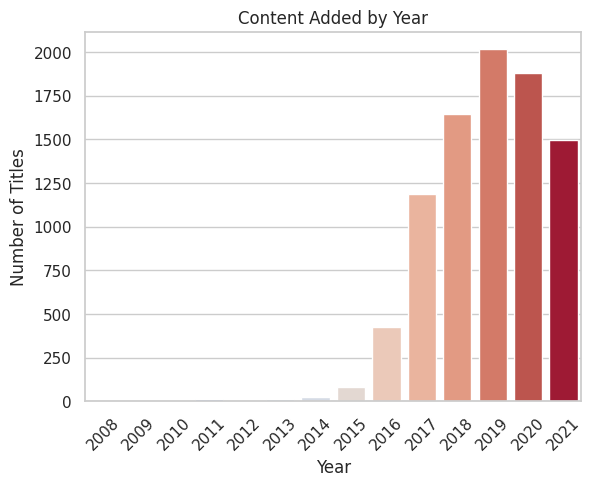

In [ ]:
data['year_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year

sns.countplot(data=data, x='year_added', hue='year_added', palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Top 10 Directors

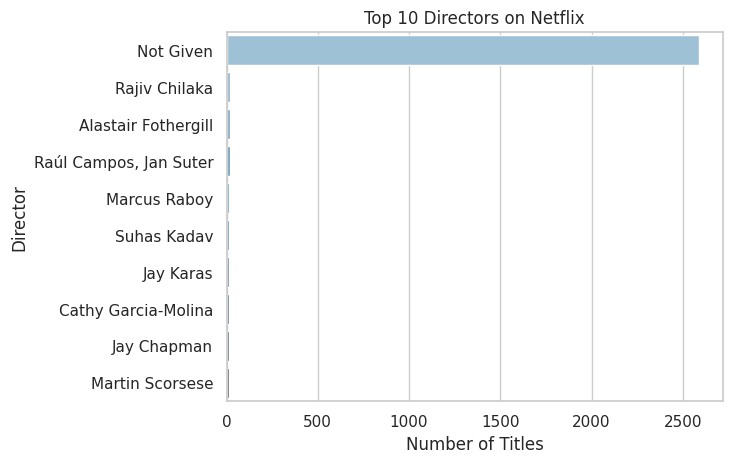

In [ ]:
top_directors=data['director'].value_counts().head(10)
top_directors_data = top_directors.reset_index()
top_directors_data.columns = ['Director', 'Count']

sns.barplot(data=top_directors_data, x='Count', y='Director', hue='Director', palette='Blues_d', legend=False)

plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Ratings Distribution

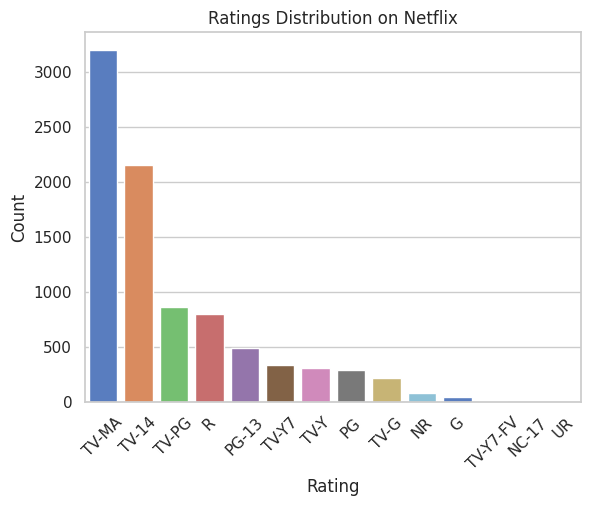

In [ ]:
rating_data = data['rating'].value_counts().reset_index()
rating_data.columns = ['Rating', 'Count']

sns.barplot(data=rating_data, x='Rating', y='Count', hue='Rating', palette='muted', legend=False)

plt.xticks(rotation=45)
plt.title('Ratings Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Relation Between Type & Rating

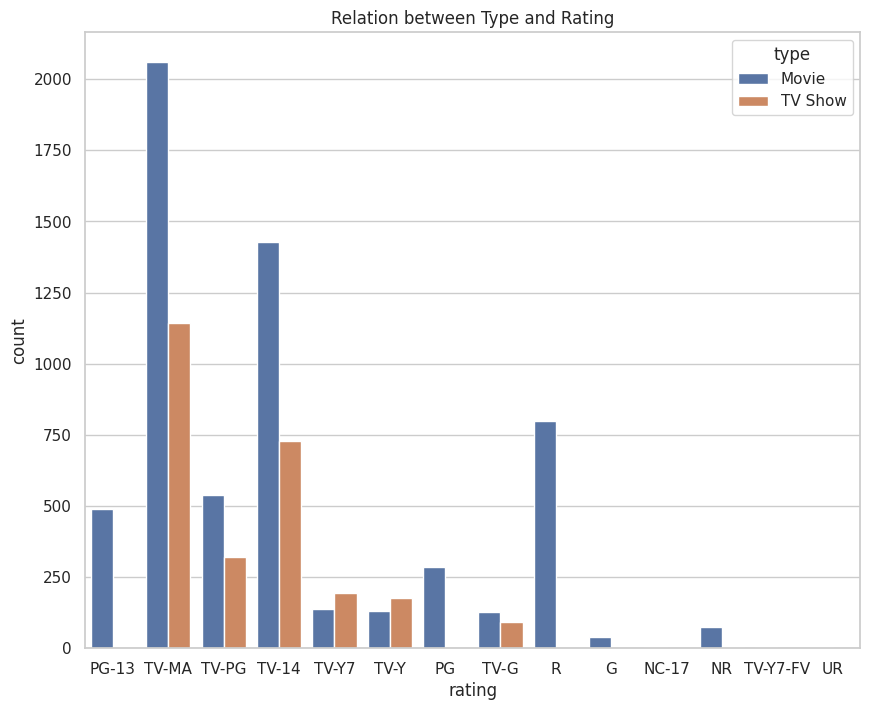

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=data)
plt.title('Relation between Type and Rating')
plt.show()


# Word Cloud of Movie Titles

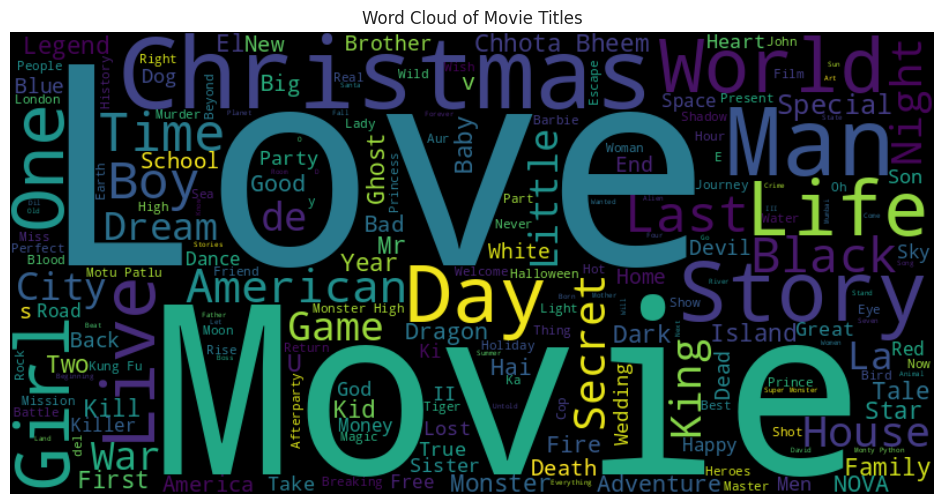

In [11]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# Word Cloud Of Country

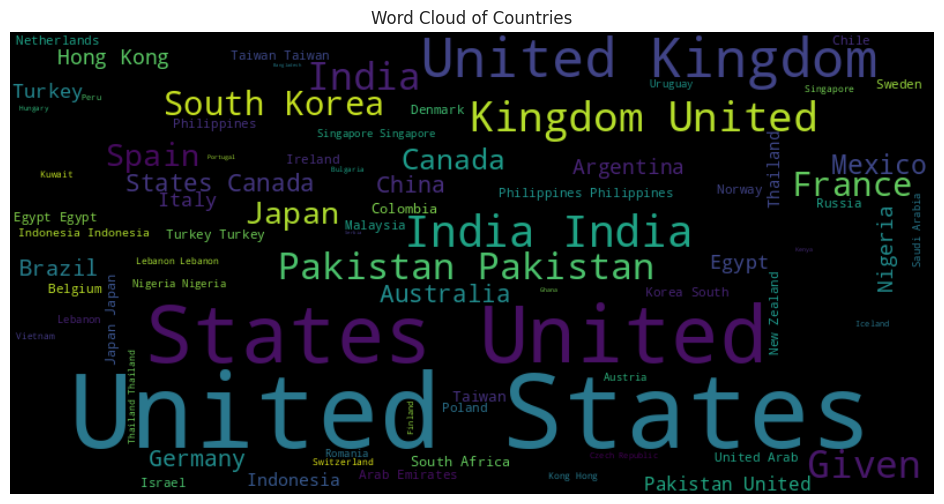

In [ ]:
countries = data['country'].dropna()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(countries))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Countries')
plt.show()

# Word Cloud Of Directors

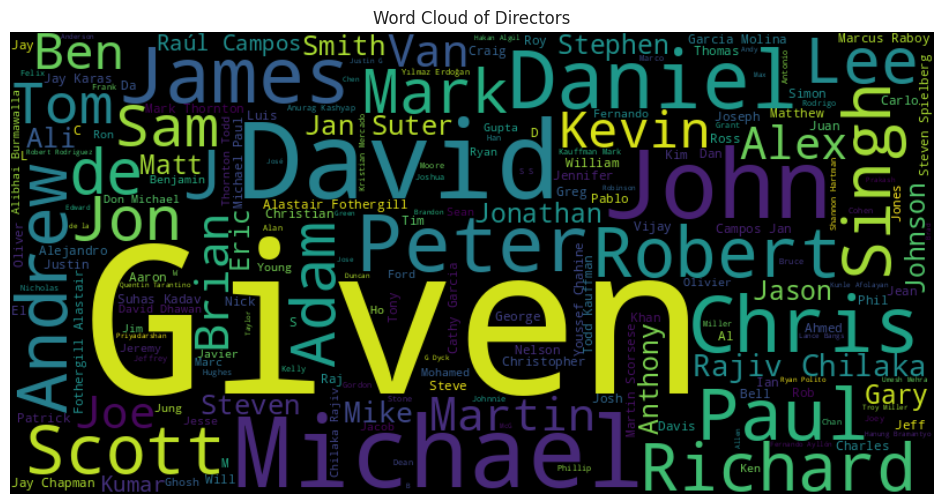

In [ ]:
directors_data = data['director'].dropna()

directors_list = directors_data.str.split(', ')
all_directors = list(chain.from_iterable(directors_list))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(all_directors))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Directors')
plt.show()


# Word Cloud Of Categories

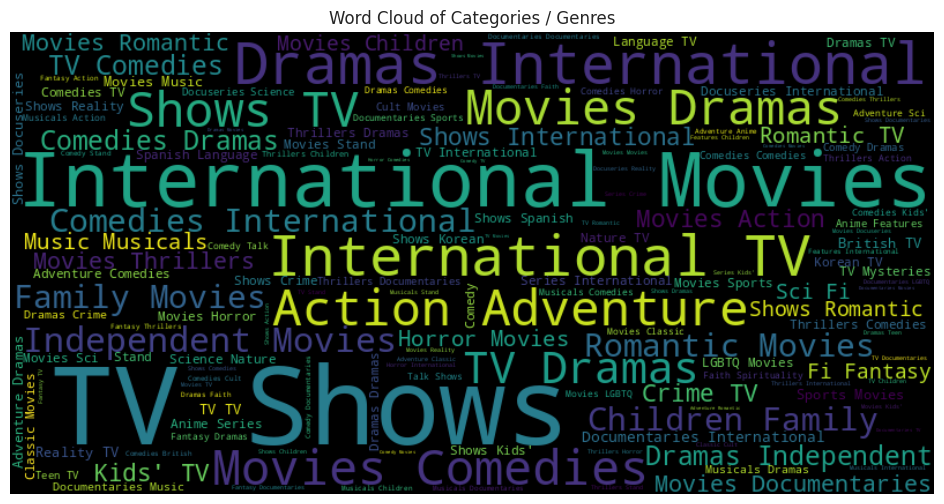

In [ ]:
categories_data = data['listed_in'].dropna()

categories_list = categories_data.str.split(', ')
all_categories = list(chain.from_iterable(categories_list))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(all_categories))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories / Genres')
plt.show()


# Monthly & Yearly content trend

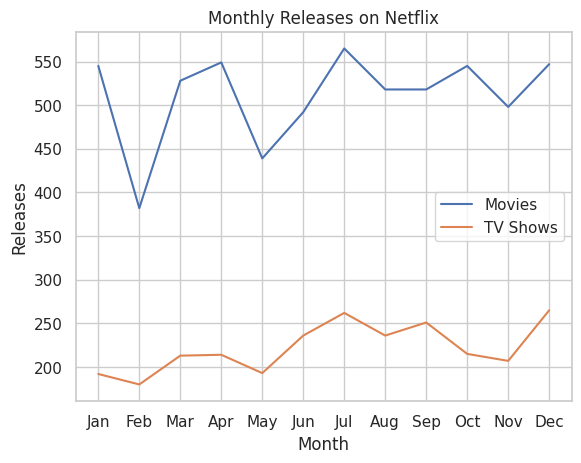

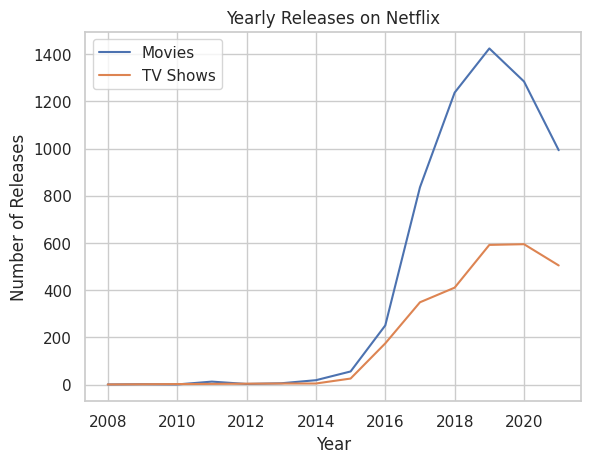

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Monthly releases
data['month_added'] = data['date_added'].dt.month

monthly_movie = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_tv = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Releases')
plt.title('Monthly Releases on Netflix')
plt.legend()
plt.grid(True)
plt.show()

# Yearly releases
data['year_added'] = data['date_added'].dt.year

yearly_movie = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_tv = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie.index, yearly_movie.values, label='Movies')
plt.plot(yearly_tv.index, yearly_tv.values, label='TV Shows')

plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Releases on Netflix')
plt.legend()
plt.grid(True)
plt.show()

# Distribution Of Content By Country

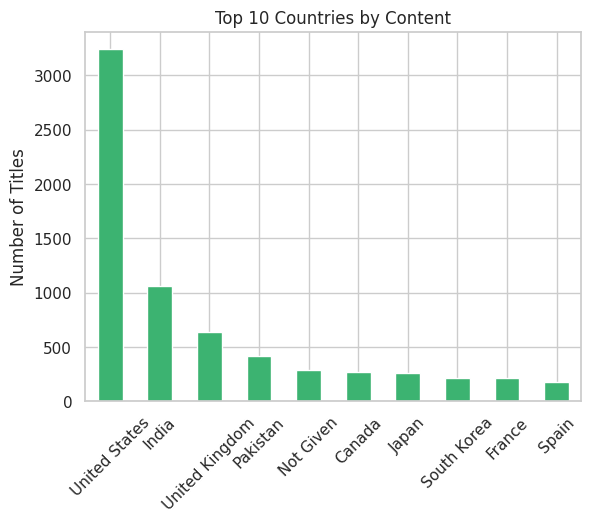

In [12]:
country_series = data['country'].dropna().str.split(', ')
countries = pd.Series(np.concatenate(country_series)).value_counts().head(10)
countries.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Countries by Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


# Content Categories

************************************************
 listed_in
Dramas, International Movies                               362
Documentaries                                              359
Stand-Up Comedy                                            334
Comedies, Dramas, International Movies                     274
Dramas, Independent Movies, International Movies           252
                                                          ... 
TV Action & Adventure, TV Comedies                           1
Romantic TV Shows, Spanish-Language TV Shows, TV Dramas      1
Classic & Cult TV, Kids' TV, Spanish-Language TV Shows       1
Anime Series, Crime TV Shows, TV Thrillers                   1
British TV Shows, Docuseries, Reality TV                     1
Name: count, Length: 513, dtype: int64 
************************************************


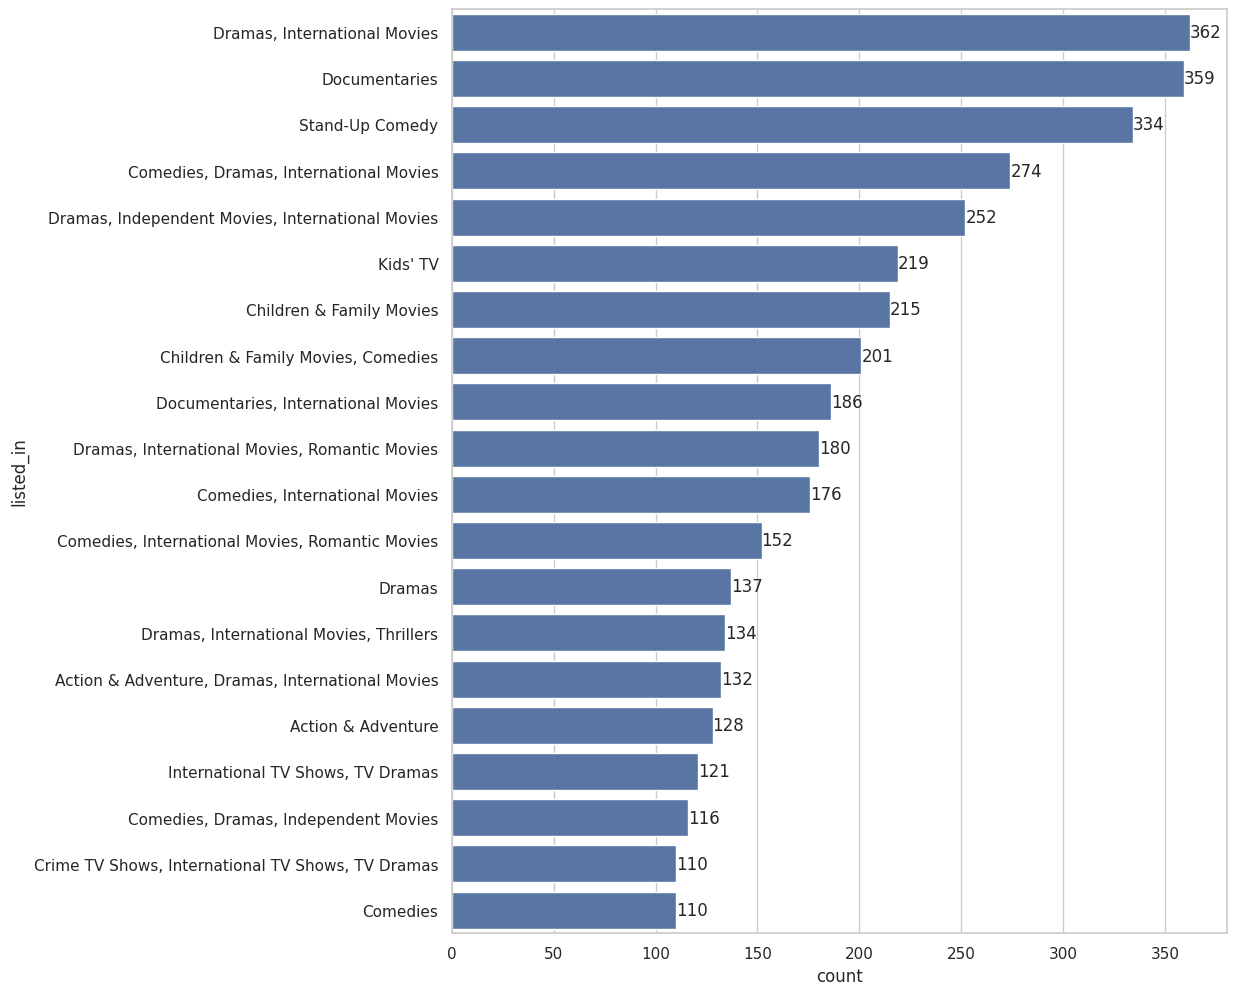

In [ ]:
len(data['listed_in'].unique())
print('************************************************\n',data['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=data, y="listed_in", order=data['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()


# Export Cleaned Data

In [ ]:
data.to_csv("cleaned_data.csv" , index=False)